<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Outlier Detection**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform exploratory data analysis or EDA. 
You will explore the distribution of key variables and focus on identifying outliers in this lab.


## Objectives


In this lab, you will perform the following:


-  Analyze the distribution of key variables in the dataset.

-  Identify and remove outliers using statistical methods.

-  Perform relevant statistical and correlation analysis.


#### Install and import the required libraries


In [1]:
# !pip install pandas
# !pip install matplotlib
# !pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<h3>Step 1: Load and Explore the Dataset</h3>


Load the dataset into a DataFrame and examine the structure of the data.


In [2]:
file_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

#Create the dataframe
df = pd.read_csv(file_url)

#Display the top 10 records
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


In [3]:
data = df.copy()

<h3>Step 2: Plot the Distribution of Industry</h3>


Explore how respondents are distributed across different industries.

- Plot a bar chart to visualize the distribution of respondents by industry.

- Highlight any notable trends.


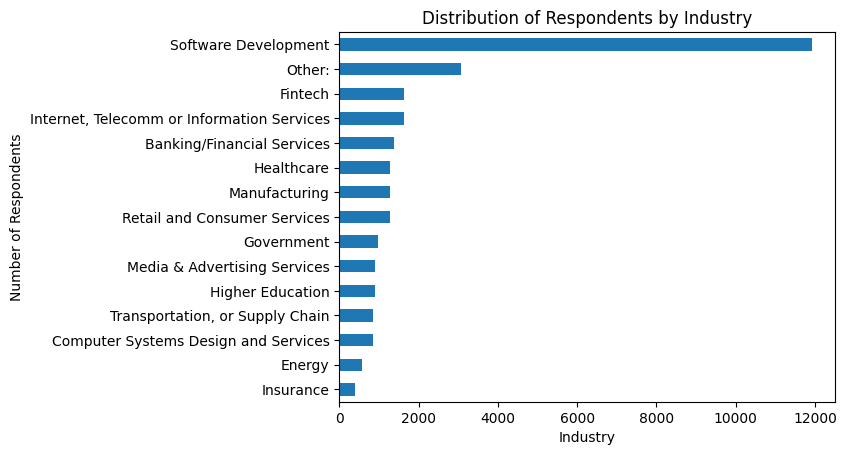

In [4]:
dist_industry = data['Industry'].value_counts(ascending=True)
dist_industry.plot(kind='barh')
plt.title('Distribution of Respondents by Industry')
plt.ylabel('Number of Respondents')
plt.xlabel('Industry')
plt.show()

<h3>Step 3: Identify High Compensation Outliers</h3>


Identify respondents with extremely high yearly compensation.

- Calculate basic statistics (mean, median, and standard deviation) for `ConvertedCompYearly`.

- Identify compensation values exceeding a defined threshold (e.g., 3 standard deviations above the mean).


In [5]:
# Calculate basic statistics for ConvertedCompYearly
data['ConvertedCompYearly'].describe()

count    2.343500e+04
mean     8.615529e+04
std      1.867570e+05
min      1.000000e+00
25%      3.271200e+04
50%      6.500000e+04
75%      1.079715e+05
max      1.625660e+07
Name: ConvertedCompYearly, dtype: float64

In [6]:
# Count nulls
print(data['ConvertedCompYearly'].isnull().sum())

42002


In [ ]:
# Remove rows with null ConvertedCompYearly
data_clean = data.dropna(subset=['ConvertedCompYearly'])

In [8]:
# Identify compensation values exceeding a defined threshold
comp_mean = data_clean['ConvertedCompYearly'].mean()
comp_std = data_clean['ConvertedCompYearly'].std()
comp_theshold = comp_mean + (3*comp_std)
outliers_3std = data_clean[data_clean['ConvertedCompYearly'] > comp_theshold]
outliers_list = set(outliers_3std['ConvertedCompYearly'])

print(f"Number of outliers (3 STD): {len(outliers_3std)}")
print(outliers_list)

Number of outliers (3 STD): 89
{2000000.0, 800000.0, 1200000.0, 720000.0, 1140481.0, 1295242.0, 1074062.0, 650000.0, 810000.0, 1562898.0, 2237846.0, 1273879.0, 980887.0, 1728025.0, 713372.0, 900000.0, 1302817.0, 1188001.0, 1300000.0, 3367716.0, 1052581.0, 13818022.0, 740517.0, 764327.0, 1288874.0, 1250348.0, 2048046.0, 750000.0, 798000.0, 670000.0, 660660.0, 2584118.0, 1550391.0, 675000.0, 912953.0, 1031099.0, 1000000.0, 9000000.0, 1332930.0, 1184707.0, 4936778.0, 850000.0, 6340564.0, 803285.0, 2153432.0, 16256603.0, 1750749.0, 1500000.0, 700000.0, 712801.0, 1900000.0, 945000.0, 2014062.0, 950000.0, 1750000.0, 859250.0, 875000.0}


<h3>Step 4: Detect Outliers in Compensation</h3>


Identify outliers in the `ConvertedCompYearly` column using the IQR method.

- Calculate the Interquartile Range (IQR).

- Determine the upper and lower bounds for outliers.

- Count and visualize outliers using a box plot.


In [9]:
# Calculate the Interquartile Range (IQR)
Q1 = data_clean['ConvertedCompYearly'].quantile(0.25)
Q3 = data_clean['ConvertedCompYearly'].quantile(0.75)
IQR = Q3 - Q1

In [10]:
# Determine the upper and lower bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [11]:
# Count outliers
outliers_IQR = data_clean[(data_clean['ConvertedCompYearly'] < lower_bound) | (data_clean['ConvertedCompYearly'] > upper_bound)]
print(f"Number of outliers (IQR): {len(outliers_IQR)}")

Number of outliers (IQR): 978


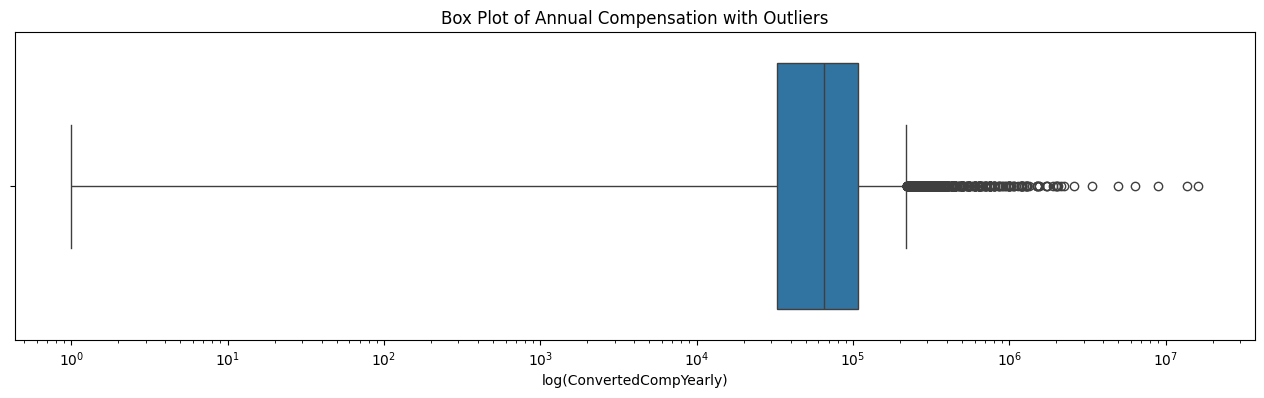

In [ ]:
# Visualize outliers using a box plot
plt.figure(figsize=(16, 4))
sns.boxplot(data=data_clean, x='ConvertedCompYearly')
plt.title('Box Plot of Annual Compensation with Outliers')
plt.xlabel('log(ConvertedCompYearly)')
plt.xscale('log') # for better visualization of spread
plt.show()

<h3>Step 5: Remove Outliers and Create a New DataFrame</h3>


Remove outliers from the dataset.

- Create a new DataFrame excluding rows with outliers in `ConvertedCompYearly`.
- Validate the size of the new DataFrame.


In [13]:
data_no_outliers = data_clean[(data_clean['ConvertedCompYearly'] >= lower_bound) & (data_clean['ConvertedCompYearly'] <= upper_bound)]
print(f"Before outlier removal: {len(data_clean)}")
print(f"Number of outliers (IQR): {len(outliers_IQR)}")
print(f"After outlier removal: {len(data_no_outliers)}")

Before outlier removal: 23435
Number of outliers (IQR): 978
After outlier removal: 22457


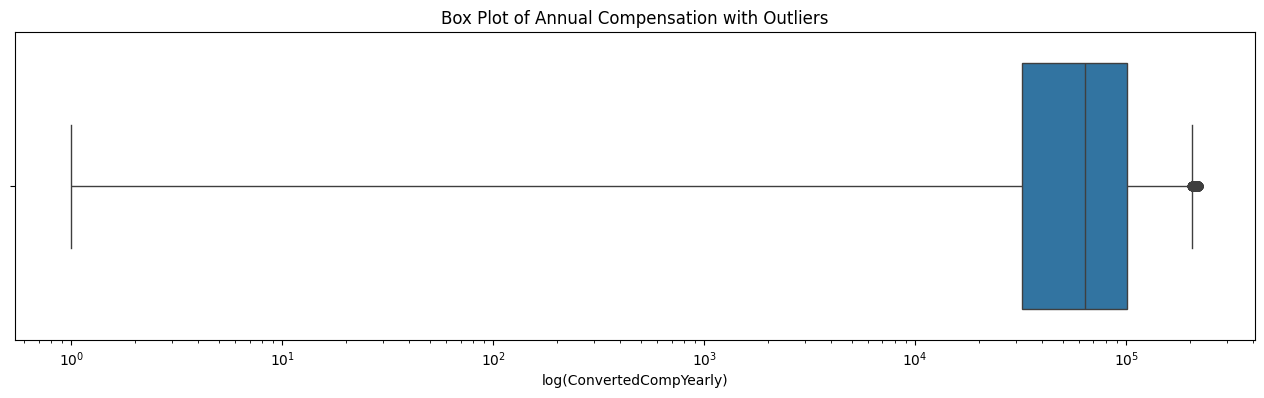

In [ ]:
# Visualize the data without outliers
plt.figure(figsize=(16, 4))
sns.boxplot(data=data_no_outliers, x='ConvertedCompYearly')
plt.title('Box Plot of Annual Compensation with Outliers')
plt.xlabel('log(ConvertedCompYearly)')
plt.xscale('log') # for better visualization of spread
plt.show()

<h3>Step 6: Correlation Analysis</h3>


Analyze the correlation between `Age` (transformed) and other numerical columns.

- Map the `Age` column to approximate numeric values.

- Compute correlations between `Age` and other numeric variables.

- Visualize the correlation matrix.


In [15]:
data['Age'].unique()

array(['Under 18 years old', '35-44 years old', '45-54 years old',
       '18-24 years old', '25-34 years old', '55-64 years old',
       'Prefer not to say', '65 years or older'], dtype=object)

In [16]:
# Map the Age column to approximate numeric values
age_mapping = {
    'Under 18 years old': 15,
    '18-24 years old': 21,
    '25-34 years old': 30,
    '35-44 years old': 40,
    '45-54 years old': 50,
    '55-64 years old': 60,
    '65 years or older': 70,
    'Prefer not to say': None
}
data['AgeGroup'] = data['Age'].map(age_mapping)
data['AgeGroup'].value_counts()

AgeGroup
30.0    23911
40.0    14942
21.0    14098
50.0     6249
60.0     2575
15.0     2568
70.0      772
Name: count, dtype: int64

In [17]:
# Compute correlations between Age and other numeric variables
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns
numeric_cols = numeric_cols.drop('ResponseId') # exclude ResponseId
corr_matrix = data[numeric_cols].corr()
corr_matrix

,CompTotal,WorkExp,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,ConvertedCompYearly,JobSat,AgeGroup
CompTotal,0.000000,0.028766,-0.004891,-0.002719,-0.003033,-0.006311,-0.005893,-0.004585,-0.004494,-0.003198,-0.003045,0.080457,-0.015770,-0.002695
WorkExp,0.028766,1.000000,-0.026490,-0.067241,-0.104525,-0.065352,-0.101461,-0.046958,-0.088090,-0.113707,-0.108279,0.154114,0.097322,0.848567
JobSatPoints_1,-0.004891,-0.026490,1.000000,0.445710,0.633765,0.618618,0.603157,0.627385,0.597527,0.585087,0.607792,0.020306,0.094068,-0.027608
JobSatPoints_4,-0.002719,-0.067241,0.445710,1.000000,0.526254,0.449400,0.459253,0.438763,0.472516,0.499387,0.528395,0.018197,0.029677,-0.076200
JobSatPoints_5,-0.003033,-0.104525,0.633765,0.526254,1.000000,0.613933,0.607949,0.630353,0.619644,0.643538,0.690993,-0.023281,0.049224,-0.101506
JobSatPoints_6,-0.006311,-0.065352,0.618618,0.449400,0.613933,1.000000,0.692166,0.645094,0.632211,0.592528,0.604585,-0.008518,0.051341,-0.049930
JobSatPoints_7,-0.005893,-0.101461,0.603157,0.459253,0.607949,0.692166,1.000000,0.698240,0.659558,0.642905,0.618444,-0.036431,0.038339,-0.083166
JobSatPoints_8,-0.004585,-0.046958,0.627385,0.438763,0.630353,0.645094,0.698240,1.000000,0.655668,0.617320,0.625185,-0.011080,0.058258,-0.046113
JobSatPoints_9,-0.004494,-0.088090,0.597527,0.472516,0.619644,0.632211,0.659558,0.655668,1.000000,0.663628,0.650676,-0.015867,0.039173,-0.081717
JobSatPoints_10,-0.003198,-0.113707,0.585087,0.499387,0.643538,0.592528,0.642905,0.617320,0.663628,1.000000,0.737598,-0.022228,0.045063,-0.114556


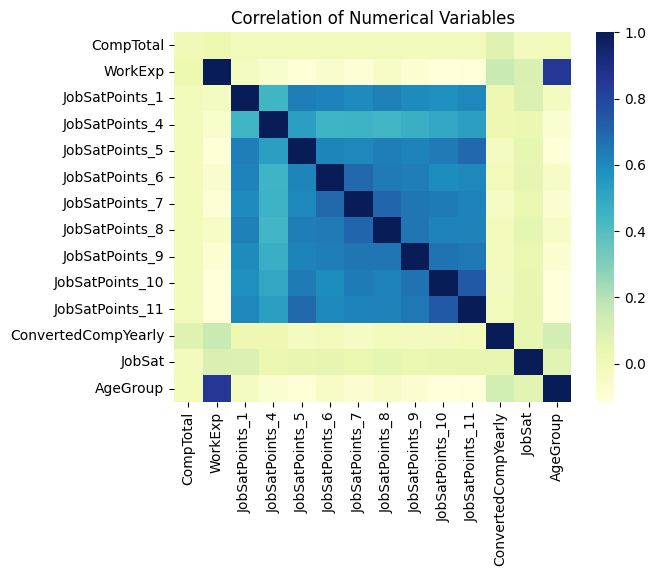

In [18]:
# Visualize the correlation matrix
sns.heatmap(corr_matrix, cmap='YlGnBu')
plt.title('Correlation of Numerical Variables')
plt.show()

<h3> Summary </h3>


In this lab, you developed essential skills in **Exploratory Data Analysis (EDA)** with a focus on outlier detection and removal. Specifically, you:


- Loaded and explored the dataset to understand its structure.

- Analyzed the distribution of respondents across industries.

- Identified and removed high compensation outliers using statistical thresholds and the Interquartile Range (IQR) method.

- Performed correlation analysis, including transforming the `Age` column into numeric values for better analysis.


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-1|1.1|Madhusudan Moole|Reviewed and updated lab|                                                                                    
|2024-09-29|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
